<a href="https://colab.research.google.com/github/geekela/Chemoinformatics_project/blob/main/Classification/SIDER_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!git clone https://github.com/geekela/Chemoinformatics_project.git /content/Chemoinformatics_project

fatal: destination path '/content/Chemoinformatics_project' already exists and is not an empty directory.


In [35]:
%cd /content/Chemoinformatics_project

/content/Chemoinformatics_project


In [36]:
!ls -la

total 52
drwxr-xr-x 8 root root 4096 Oct 23 08:15 .
drwxr-xr-x 1 root root 4096 Oct 23 07:56 ..
drwxr-xr-x 4 root root 4096 Oct 23 08:01 Classification
drwxr-xr-x 3 root root 4096 Oct 23 07:56 data
drwxr-xr-x 8 root root 4096 Oct 23 07:56 .git
-rw-r--r-- 1 root root 5054 Oct 23 07:56 .gitignore
drwxr-xr-x 3 root root 4096 Oct 23 08:15 lightning_logs
drwxr-xr-x 2 root root 4096 Oct 23 08:15 mlp_checkpoints
-rw-r--r-- 1 root root 7246 Oct 23 07:56 README.md
drwxr-xr-x 3 root root 4096 Oct 23 07:56 Regression
-rw-r--r-- 1 root root  218 Oct 23 07:56 requirements.txt


## Import

In [37]:
!pip install -r requirements.txt
!pip install deepchem
!pip install rdkit
!pip install pycm
!pip install pytorch-lightning wandb rdkit ogb
!pip install torch_geometric
!pip install optuna

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import deepchem as dc
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import Draw, rdFingerprintGenerator, AllChem
from rdkit.Chem.Descriptors import MolWt, TPSA, NumHDonors, NumHAcceptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

In [39]:
df=pd.read_csv('/content/Chemoinformatics_project/data/raw/sider.csv')

In [40]:
df.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,...,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,0,1,0,1,0


## Pre-processing


Non-Numeric Columns (Categorical/Objects):
['smiles']


[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:00] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:01] WARNING: not removing hydrogen atom without neighbors
[08:23:02] WARNING: not r


--- SIDER Preprocessing Report ---

Final dataset size: (1427, 29)



,canonical_smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,...,Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecule
0,NCCNCCNCCNCCN,1,1,0,0,1,1,1,0,0,...,0,1,1,0,0,1,1,1,0,
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,0,1,0,0,1,1,1,0,0,...,1,1,0,0,0,1,0,1,0,
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...,0,1,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,
3,C#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,1,1,0,1,1,1,1,0,1,...,1,1,1,1,1,0,0,1,1,
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,1,1,0,1,1,1,1,0,1,...,1,1,1,0,0,1,0,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@...,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,
1423,CC[C@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@...,1,1,0,1,1,1,1,0,1,...,1,1,1,1,0,1,1,1,1,
1424,CCOc1ccc(Cc2cc([C@@H]3O[C@H](CO)[C@@H](O)[C@H]...,1,1,0,0,1,1,1,0,1,...,1,0,0,1,0,0,1,1,1,
1425,O=c1[nH]c2ccccc2n1C1CCN(CCCC(c2ccc(F)cc2)c2ccc...,0,1,0,1,1,1,1,0,0,...,0,0,1,1,0,0,1,1,1,

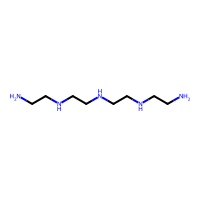
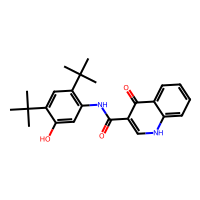
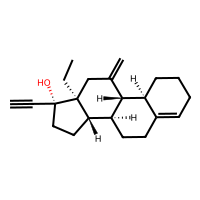
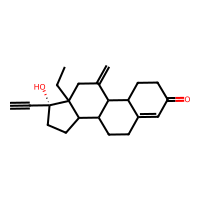
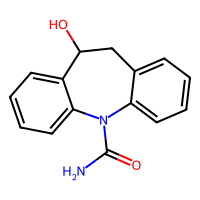
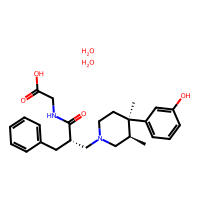
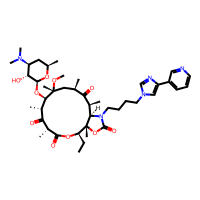
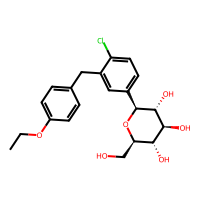
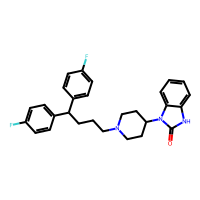
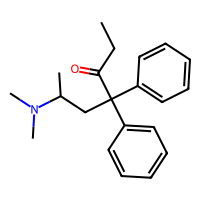

In [41]:
from Classification.src.sider_preprocessing import sider_preprocessing

df_cleaned = sider_preprocessing(df)

## Featurizer

In [42]:
from Classification.src.sider_featurizer import featurizer

df_final = featurizer(df=df_cleaned, mol_col='Molecule', fpSize=2048)

Feature engineering complete. Final DataFrame shape: (1427, 2085)
Total features added: 7 simple + 2048 Morgan = 2055


In [43]:
df_final.columns

Index(['canonical_smiles', 'Molecule', 'Hepatobiliary disorders',
       'Metabolism and nutrition disorders', 'Product issues', 'Eye disorders',
       'Investigations', 'Musculoskeletal and connective tissue disorders',
       'Gastrointestinal disorders', 'Social circumstances',
       ...
       'Morgan_2038', 'Morgan_2039', 'Morgan_2040', 'Morgan_2041',
       'Morgan_2042', 'Morgan_2043', 'Morgan_2044', 'Morgan_2045',
       'Morgan_2046', 'Morgan_2047'],
      dtype='object', length=2085)

##ACP and feature selection

In [ ]:
from Classification.src.sider_pca import analyze_pca_variance
analyze_pca_variance(df_final)

## Models

In [44]:
X = df_final.iloc[:, 29:].copy()
y = df_final.iloc[:, 2:29]

X = X.select_dtypes(include=np.number)

# Apply VarianceThreshold to remove zero-variance features
selector = VarianceThreshold(threshold=0.0)
X_cleaned_array = selector.fit_transform(X)
X = pd.DataFrame(X_cleaned_array, columns=X.columns[selector.get_support()])

In [45]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Data split: {len(X_train)} training samples, {len(X_test)} testing samples.")

Data split: 1141 training samples, 286 testing samples.


In [ ]:
from Classification.sider_baseline_models.py import train_and_evaluate_models
train_and_evaluate_models(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

##UMAP

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

# Scale the data once before creating the plots
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the UMAP projection
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(X_scaled)

umap_df = pd.DataFrame(embedding, columns=['UMAP 1', 'UMAP 2'])

In [ ]:
# Plot interesting labels

from Classification.src.sider_umap import plot_umap

plot_umap(umap_df, y, 'Gastrointestinal disorders')
plot_umap(umap_df, y, 'Metabolism and nutrition disorders')
plot_umap(umap_df, y, 'Product issues')

##SVM Optimization

In [ ]:
from Classification.src.sider_svm_optimization import optimize_svm

# RandomizedSearchCV on non RBF SVM
best_svm_model = optimize_svm(X_train_scaled, y_train)

## MLP

In [46]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import Dataset, DataLoader, random_split
from pytorch_lightning.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import roc_auc_score

In [47]:
class SIDERDataset(Dataset):
    """PyTorch Dataset wrapper for SIDER data."""
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.values if hasattr(y, 'values') else y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class MLP_SIDER(pl.LightningModule):
    """
    Multi-Layer Perceptron for SIDER multi-label classification.

    Args:
        input_dim: Number of input features
        hidden_dims: List of hidden layer dimensions
        out_dim: Number of output labels (27 for SIDER)
        dropout: Dropout probability for regularization
        lr: Learning rate
    """

    def __init__(self, input_dim, hidden_dims=[512, 256, 128], out_dim=27, dropout=0.3, lr=0.001):
        super().__init__()
        self.save_hyperparameters()
        self.lr = lr

        # Build MLP architecture dynamically
        layers = []
        prev_dim = input_dim

        # Add hidden layers with activation, batch norm, and dropout
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.Dropout(dropout))
            prev_dim = hidden_dim

        # Output layer (no activation - using BCEWithLogitsLoss)
        layers.append(nn.Linear(prev_dim, out_dim))

        self.network = nn.Sequential(*layers)

        # Loss function for multi-label classification
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, x):
        return self.network(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)
        self.log('train_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = self.criterion(logits, y)
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        probs = torch.sigmoid(logits)
        return {'preds': probs, 'targets': y}

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=5
        )
        return {
            'optimizer': optimizer,
            'lr_scheduler': {
                'scheduler': scheduler,
                'monitor': 'val_loss'
            }
        }

In [48]:
# Prepare data for MLP
# Using the same split as before (X_train_scaled, X_test_scaled from cell 15)

train_dataset = SIDERDataset(X_train_scaled, y_train)
test_dataset = SIDERDataset(X_test_scaled, y_test)

# Create validation split from training data
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(
    train_dataset, [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_subset)}")
print(f"Validation samples: {len(val_subset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Input features: {X_train_scaled.shape[1]}")

Training samples: 1026
Validation samples: 115
Test samples: 286
Input features: 2049


In [49]:
# Initialize MLP model
input_dim = X_train_scaled.shape[1]
mlp_model = MLP_SIDER(
    input_dim=input_dim,
    hidden_dims=[512, 256, 128],
    out_dim=27,
    dropout=0.3,
    lr=0.001
)

# Setup callbacks
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='mlp_checkpoints/',
    filename='best-mlp-model',
    save_top_k=1,
    mode='min'
)

early_stop_callback = EarlyStopping(
    monitor='val_loss',
    patience=15,
    mode='min',
    verbose=True
)

# Train the model
trainer = pl.Trainer(
    max_epochs=100,
    callbacks=[checkpoint_callback, early_stop_callback],
    accelerator='auto',
    log_every_n_steps=10
)

print("--- Training MLP model... ---")
trainer.fit(mlp_model, train_loader, val_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:751: Checkpoint directory /content/Chemoinformatics_project/mlp_checkpoints exists and is not empty.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | network   | Sequential        | 1.2 M  | train
1 | criterion | BCEWithLogitsLoss | 0      | train
--------------------------------------------------------
1.2 M     Trainable params
0         Non-trainable params
1.2 M     Total params
4.876     Total estimated model params size (MB)
15        Modules in train mode
0         Modules in eval mode


--- Training MLP model... ---


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved. New best score: 0.687


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.048 >= min_delta = 0.0. New best score: 0.639


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.021 >= min_delta = 0.0. New best score: 0.618


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.056 >= min_delta = 0.0. New best score: 0.562


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.026 >= min_delta = 0.0. New best score: 0.535


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.023 >= min_delta = 0.0. New best score: 0.513


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.009 >= min_delta = 0.0. New best score: 0.504


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.503


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_loss improved by 0.001 >= min_delta = 0.0. New best score: 0.503


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Monitored metric val_loss did not improve in the last 15 records. Best score: 0.503. Signaling Trainer to stop.


In [50]:
# Evaluate on test set
print("\n--- Evaluating MLP on test set... ---")

mlp_model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for batch in test_loader:
        x, y = batch
        logits = mlp_model(x)
        probs = torch.sigmoid(logits)
        all_preds.append(probs.cpu().numpy())
        all_targets.append(y.cpu().numpy())

all_preds = np.vstack(all_preds)
all_targets = np.vstack(all_targets)

# Calculate macro AUC-ROC
macro_auc = roc_auc_score(all_targets, all_preds, average='macro')
micro_auc = roc_auc_score(all_targets, all_preds, average='micro')

print(f"\nMLP Performance:")
print(f"Macro AUC-ROC: {macro_auc:.4f}")
print(f"Micro AUC-ROC: {micro_auc:.4f}")


--- Evaluating MLP on test set... ---

MLP Performance:
Macro AUC-ROC: 0.6618
Micro AUC-ROC: 0.8140


## GNN and Deep Learning

In [ ]:
# RUN THE TRAINING AND EVALUATION PIPELINE

from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import pytorch_lightning as pl
from Classification.src.sider_gnn import SIDERGraphDataset, MPNN_SIDER

sider_dataset = SIDERGraphDataset(root='./sider_pyg', df=df_cleaned)

# Split the dataset
# We split the list of graph objects, not X and y matrices.
train_data, test_data = train_test_split(
    sider_dataset, train_size=0.8, random_state=0, shuffle=True
)
train_data, val_data = train_test_split(
    train_data, train_size=0.9, random_state=42, shuffle=True # 10% of train for validation
)

# DataLoaders handle batching of graphs for the model
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Initialize and Train the Model
gnn_model = MPNN_SIDER(hidden_dim=64, out_dim=27, lr=0.001)

# PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=50, log_every_n_steps=10)
trainer.fit(model=gnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

# Evaluation
trainer.test(model=gnn_model, dataloaders=test_loader)

## Bayesian Optimization

In [ ]:
from sklearn.model_selection import train_test_split
from torch_geometric.loader import DataLoader
import pytorch_lightning as pl
from Classification.src.sider_gnn import SIDERGraphDataset, MPNN_SIDER

sider_dataset = SIDERGraphDataset(root='./sider_pyg', df=df_cleaned)

# Split the dataset
# We split the list of graph objects, not X and y matrices.
train_data, test_data = train_test_split(
    sider_dataset, train_size=0.8, random_state=0, shuffle=True
)
train_data, val_data = train_test_split(
    train_data, train_size=0.9, random_state=42, shuffle=True # 10% of train for validation
)

# DataLoaders handle batching of graphs for the model
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
from Classification.src.sider_gnn_bayesian_opti import objective

import optuna

!wandb login

# Minimize the validation loss
study = optuna.create_study(direction="minimize")
study.optimize(
    lambda trial: objective(trial, train_loader, val_loader),
    n_trials=10)
# A trial = one test with a single combination of hyperparameters by training your GNN for the maximum of epochs

print("\n--- Bayesian Optimization Complete ---")
print(f"Best validation loss: {study.best_value:.4f}")
print("Best hyperparameters found:", study.best_params)

In [ ]:
completed_trials = len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])

if completed_trials > 0:
    print(f"{completed_trials} trials were completed before stopping.")

    print("\nBest hyperparameters found so far:")
    print(study.best_params)

    print(f"\nBest validation loss so far: {study.best_value:.4f}")
else:
    print("No trials were completed before stopping.")

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

best_params = study.best_params
print("Best hyperparameters found by Bayesian Optimization:")
print(best_params)

final_gnn_model = MPNN_SIDER(
    hidden_dim=best_params['hidden_dim'],
    out_dim=27,
    lr=best_params['lr']
)

# save the best version of this final model
final_checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath="final_model_checkpoints/",
    filename="best-final-gnn-model",
    save_top_k=1,
    mode="min"
)

final_trainer = pl.Trainer(
    max_epochs=50,
    callbacks=[final_checkpoint_callback],
    accelerator="auto"
)

print("\n--- Training the final GNN model with the best hyperparameters... ---")

# Train the final model
final_trainer.fit(model=final_gnn_model, train_dataloaders=train_loader, val_dataloaders=val_loader)

print("\n--- Final evaluation on the test set... ---")
final_trainer.test(model=final_gnn_model, dataloaders=test_loader, ckpt_path="best")

In [ ]:
checkpoint_path = "final_model_checkpoints/best-final-gnn-model.ckpt"

best_model_from_checkpoint = MPNN_SIDER.load_from_checkpoint(
    checkpoint_path,
    hidden_dim=best_params['hidden_dim'], # Use the value found from optimization
    out_dim=27
)

test_trainer = pl.Trainer()
test_trainer.test(model=best_model_from_checkpoint, dataloaders=test_loader)

## Use a pre-trained Transformer

In [ ]:
from Classification.src.chemberta_embeddings import get_chemberta_embeddings
X_transformer_features = get_chemberta_embeddings(df_cleaned['canonical_smiles'].tolist())

In [ ]:
print(f"Shape of the feature matrix (X): {X_transformer_features.shape}")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import hamming_loss, classification_report, roc_auc_score

y = df_final.iloc[:, 2:29]
X_train, X_test, y_train, y_test = train_test_split(X_transformer_features, y, test_size=0.2, random_state=42)

# Choose the best parameters from grid search
base_classifier = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=42, class_weight='balanced')

multi_label_model = MultiOutputClassifier(estimator=base_classifier)

print("Training the multi-label model")
multi_label_model.fit(X_train, y_train)

# 1. Get the list of probability arrays
y_pred_proba_list = multi_label_model.predict_proba(X_test)

# 2. Reshape the probabilities into a proper 2D DataFrame
# We iterate through the list and extract the probability of the positive class (column at index 1) for each label.
y_pred_proba_df = pd.DataFrame({
    y_test.columns[i]: proba[:, 1]
    for i, proba in enumerate(y_pred_proba_list)
})

# 3. Calculate metrics
predictions = multi_label_model.predict(X_test)
loss = hamming_loss(y_test, predictions)

# Use the correctly formatted probabilities DataFrame for roc_auc_score
roc_auc_macro = roc_auc_score(y_test, y_pred_proba_df, average='macro')
roc_auc_micro = roc_auc_score(y_test, y_pred_proba_df, average='micro')

print(f"\nHamming Loss: {loss:.4f}")
print(f"ROC AUC Score (Macro Average): {roc_auc_macro:.4f}")
print(f"ROC AUC Score (Micro Average): {roc_auc_micro:.4f}")

In [ ]:
print(classification_report(y_test, predictions, target_names=y.columns))